Connected to Data370_25au_p312 (Python 3.12.12)

# Problem Statement
### Why this dataset was chosen:
 I selected the **Open Images Dataset V7 (Google)** as recommended
 because it represents a high-quality, real-world scenario.
 Unlike "toy" datasets such as CIFAR-10 or MNIST, which feature low-resolution or isolated subjects,
 Open Images contains diverse environments, varying lighting conditions, and partial occlusions.
 This complexity is necessary to train a robust model that can handle the variability found in actual street scenes
### Real-world relevance:
 Automated vehicle classification is a critical component of modern Intelligent Transportation Systems (ITS).
 Accurate classification of road users (e.g., distinguishing a bicycle from a truck) is essential for:

   **Autonomous Driving:** Perception systems must identify surrounding objects to make safe navigation decisions.

   **Smart City Planning:** Analyzing traffic flow and composition to optimize traffic light timing and road usage.

   **Safety Monitoring:** Detecting prohibited vehicles in restricted zones (e.g., trucks in residential areas).
### What the model should achieve:
 The goal of this project is **Image Classification**.
 The model should take a raw input image of a road user and correctly categorize it into one of five classes: Car, Bus, Truck, Motorcycle, or Bicycle.
 The successful model will demonstrate the ability to distinguish between visually similar classes (such as motorcycles vs. bicycles) in complex backgrounds.

 Analyzing data in: /Users/ryyyanf/Desktop/Haokuang_FangProjects-for-Uchi-Machine-Learning/bigdata/traffic_data
 Saving plots to: /Users/ryyyanf/Desktop/Haokuang_FangProjects-for-Uchi-Machine-Learning/DATA370_Final_Project/media

--- Gathering Statistics ---
  Bicycle: 300 images
  Bus: 300 images
  Car: 300 images
  Motorcycle: 300 images
  Truck: 300 images
 Saved: eda_class_distribution.png
 Saved: eda_image_sizes.png


<ipython-input-4-805920006ec5>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


Saved: eda_sample_images.png


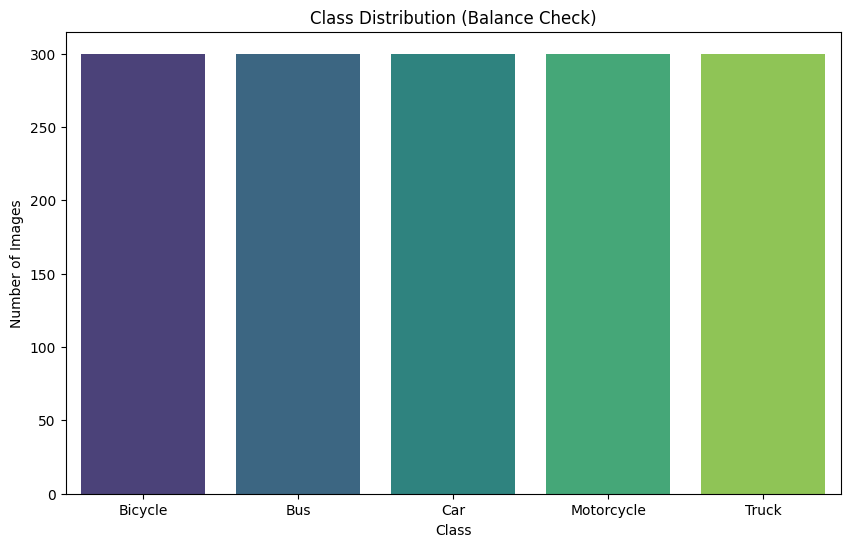

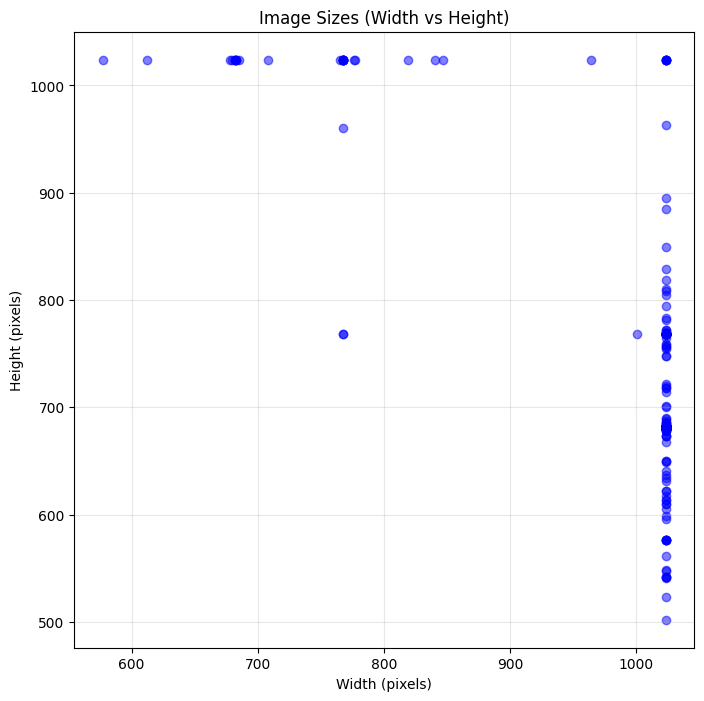

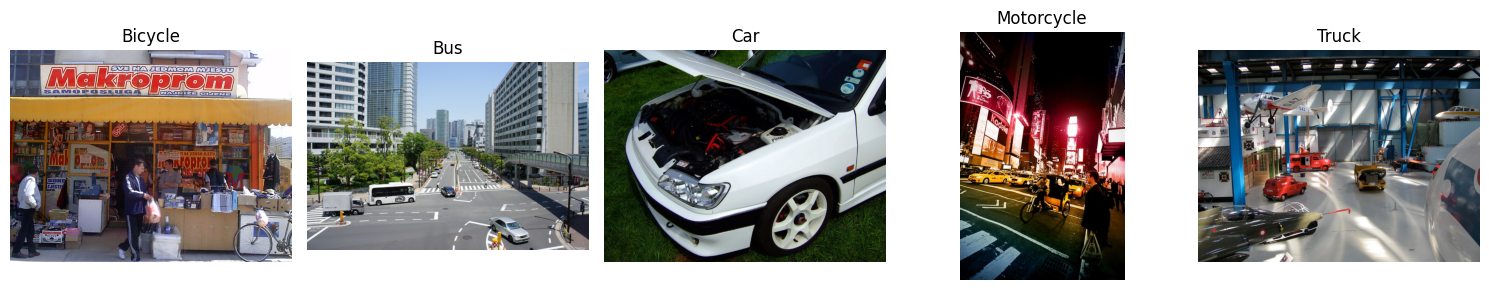

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import glob

# --- CONFIGURATION ---
# Define paths relative to this script
current_dir = os.path.dirname(os.path.abspath(__file__))
repo_root = os.path.dirname(os.path.dirname(current_dir))
data_dir = os.path.join(repo_root, "bigdata", "traffic_data")
media_dir = os.path.join(repo_root, "DATA370_Final_Project", "media")

# Create media folder if it doesn't exist
os.makedirs(media_dir, exist_ok=True)

print(f" Analyzing data in: {data_dir}")
print(f" Saving plots to: {media_dir}")

# --- 1. COUNT CLASSES ---
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
classes.sort()

class_counts = {}
image_sizes = [] # store (width, height)

print("\n--- Gathering Statistics ---")
for c in classes:
    class_path = os.path.join(data_dir, c)
    images = glob.glob(os.path.join(class_path, "*.*")) # find all files
    
    # Filter for valid images only (jpg, png, etc)
    valid_images = [img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    class_counts[c] = len(valid_images)
    print(f"  {c}: {len(valid_images)} images")

    # Sample image sizes (checking first 50 to save time, or all if you prefer)
    for img_path in valid_images[:50]: 
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size) # (width, height)
        except:
            pass

# --- 2. PLOT: Class Distribution Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Class Distribution (Balance Check)")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.savefig(os.path.join(media_dir, "eda_class_distribution.png"))
print(" Saved: eda_class_distribution.png")

# --- 3. PLOT: Image Size Scatter Plot ---
widths, heights = zip(*image_sizes)
plt.figure(figsize=(8, 8))
plt.scatter(widths, heights, alpha=0.5, color='blue')
plt.title("Image Sizes (Width vs Height)")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(media_dir, "eda_image_sizes.png"))
print(" Saved: eda_image_sizes.png")

# --- 4. PLOT: Sample Grid (Visual Inspection) ---
# Create a grid of 1 image per class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 3))
if len(classes) == 1: axes = [axes] # Handle edge case

for idx, c in enumerate(classes):
    class_path = os.path.join(data_dir, c)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg'))]
    
    if images:
        # Pick a random image
        random_img = random.choice(images)
        img_path = os.path.join(class_path, random_img)
        
        # Load and display
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(c)
        axes[idx].axis("off")

plt.tight_layout()
plt.savefig(os.path.join(media_dir, "eda_sample_images.png"))
print("Saved: eda_sample_images.png")

 Baseline Training on device: mps

[PHASE 2] Starting Baseline Training...
Dataset: 1500 images | Classes: ['Bicycle', 'Bus', 'Car', 'Motorcycle', 'Truck']

--- Model Architecture Summary ---
SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)
----------------------------------

Epoch [1/15] | Train Loss: 1.6954 | Val Acc: 23.00%
Epoch [2/15] | Train Loss: 1.6036 | Val Acc: 23.00%
Epoch [3/15] | Train Loss: 1.5665 | Val Acc: 27.00%
Epoch [4/15] | Train Loss: 1.5347 | Val Acc: 28.00%
Epoch [5/15] | Train Loss: 1.4385 | Val Acc: 27.33%
Epoch [6/15] | Train Loss: 1.3111 | Val Acc: 26.00%
Epoch [7/15] | Train Loss: 1.1288 | Val Acc: 28.00%
Epoch [8/15] | T

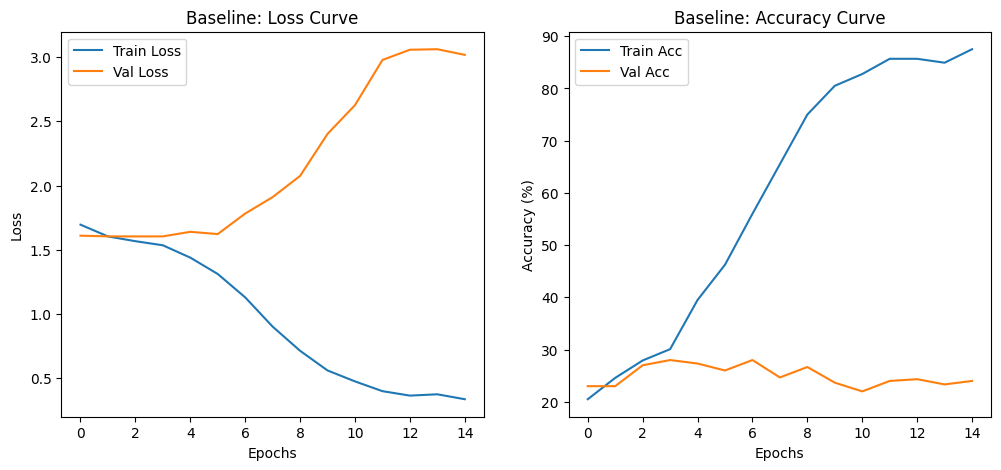

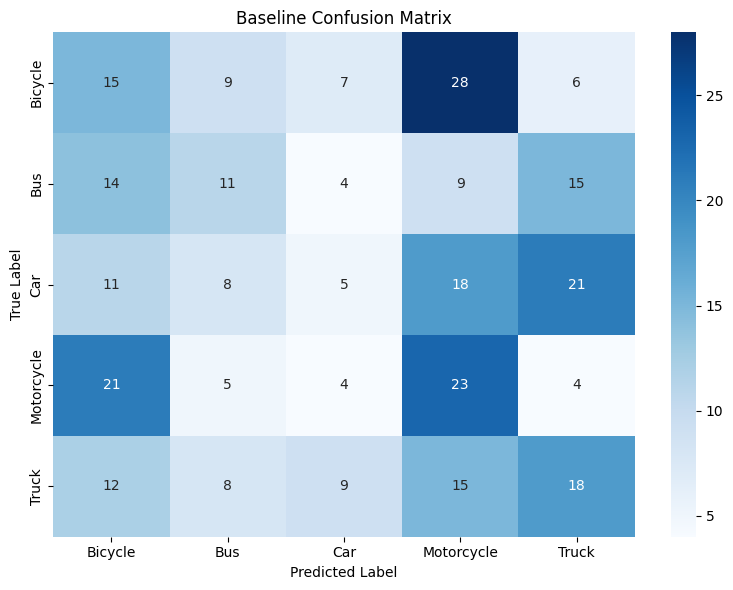

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import time
import matplotlib.pyplot as plt
import os
import numpy as np

# ==========================================
#  CONFIGURATION & SETUP
# ==========================================
current_dir = os.path.dirname(os.path.abspath(__file__))
repo_root = os.path.dirname(os.path.dirname(current_dir))
data_dir = os.path.join(repo_root, "bigdata", "traffic_data")
media_dir = os.path.join(repo_root, "DATA370_Final_Project", "media")
model_save_path = os.path.join(repo_root, "DATA370_Final_Project", "results", "baseline_model.pth")

# Hyperparameters
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 15
IMG_SIZE = 128  # Resize all images to 128x128

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(f" Baseline Training on device: {device}")

# ==========================================
#  MODEL ARCHITECTURE: Simple CNN
# ==========================================
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        # Block 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        # Block 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        # Fully Connected
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ==========================================
#  TRAINING & EVALUATION FUNCTION
# ==========================================
def run_baseline_training():
    print("\n[PHASE 2] Starting Baseline Training...")
    
    # 1. Data Preparation
    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
    ])
    
    full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
    classes = full_dataset.classes  # Get class names ['Bicycle', 'Bus', etc.]
    
    # Split: 80% Train, 20% Validation
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    
    # Use generator for reproducibility
    generator = torch.Generator().manual_seed(42)
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size], generator=generator)
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    print(f"Dataset: {len(full_dataset)} images | Classes: {classes}")
    
    # 2. Initialize Model
    model = SimpleCNN(num_classes=len(classes)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # [Requirement (i)] Architecture Summary
    print("\n--- Model Architecture Summary ---")
    print(model)
    print("----------------------------------\n")

    # 3. Training Loop
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    start_time = time.time()
    
    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        # Validation Phase (for Curves)
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        # Calculate Metrics
        avg_train_loss = running_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * correct / total
        epoch_val_acc = 100 * val_correct / val_total
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accs.append(epoch_train_acc)
        val_accs.append(epoch_val_acc)
        
        print(f"Epoch [{epoch+1}/{EPOCHS}] | Train Loss: {avg_train_loss:.4f} | Val Acc: {epoch_val_acc:.2f}%")

    # 4. Plot Learning Curves [Requirement (iii)]
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Baseline: Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Baseline: Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    curve_path = os.path.join(media_dir, "baseline_learning_curves.png")
    plt.savefig(curve_path)
    print(f"\n Learning curves saved to: {curve_path}")
    
    # 5. Save Model
    os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
    torch.save(model.state_dict(), model_save_path)
    print(f"Baseline model saved to: {model_save_path}")

    # ==========================================
    # 6. FINAL DETAILED EVALUATION
    # ==========================================
    print("\nRunning Final Detailed Evaluation...")
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # A. Per-Class Metrics Table
    print("\n" + "="*40)
    print("BASELINE: PER-CLASS METRICS")
    print("="*40)
    print(classification_report(y_true, y_pred, target_names=classes, digits=4))
    
    # B. Confusion Matrix Plot
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Baseline Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    
    cm_path = os.path.join(media_dir, "baseline_confusion_matrix.png")
    plt.savefig(cm_path)
    print(f" Confusion Matrix saved to: {cm_path}")

if __name__ == "__main__":
    run_baseline_training()

 Improved Training on device: mps
Preparing Data...
Dataset: 1500 images | Classes: ['Bicycle', 'Bus', 'Car', 'Motorcycle', 'Truck']

--- Loading Pre-trained ResNet18 ---

--- Starting Fine-Tuning ---
Epoch [1/10] Train Loss: 1.4745 | Val Acc: 50.33%
Epoch [2/10] Train Loss: 1.2677 | Val Acc: 52.00%
Epoch [3/10] Train Loss: 1.1758 | Val Acc: 54.33%
Epoch [4/10] Train Loss: 1.1459 | Val Acc: 55.33%
Epoch [5/10] Train Loss: 1.1362 | Val Acc: 53.67%
Epoch [6/10] Train Loss: 1.1168 | Val Acc: 55.33%
Epoch [7/10] Train Loss: 1.0740 | Val Acc: 57.67%
Epoch [8/10] Train Loss: 1.0703 | Val Acc: 56.33%
Epoch [9/10] Train Loss: 1.0285 | Val Acc: 54.67%
Epoch [10/10] Train Loss: 1.0828 | Val Acc: 56.33%
Training finished in 156.6s

 Curves saved to: /Users/ryyyanf/Desktop/Haokuang_FangProjects-for-Uchi-Machine-Learning/DATA370_Final_Project/media/improved_learning_curves.png
 Improved model saved to: /Users/ryyyanf/Desktop/Haokuang_FangProjects-for-Uchi-Machine-Learning/DATA370_Final_Project/resu

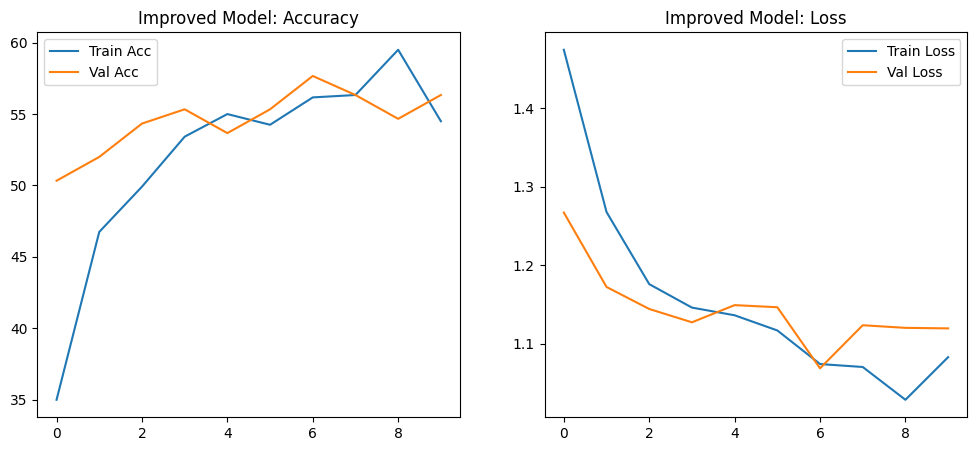

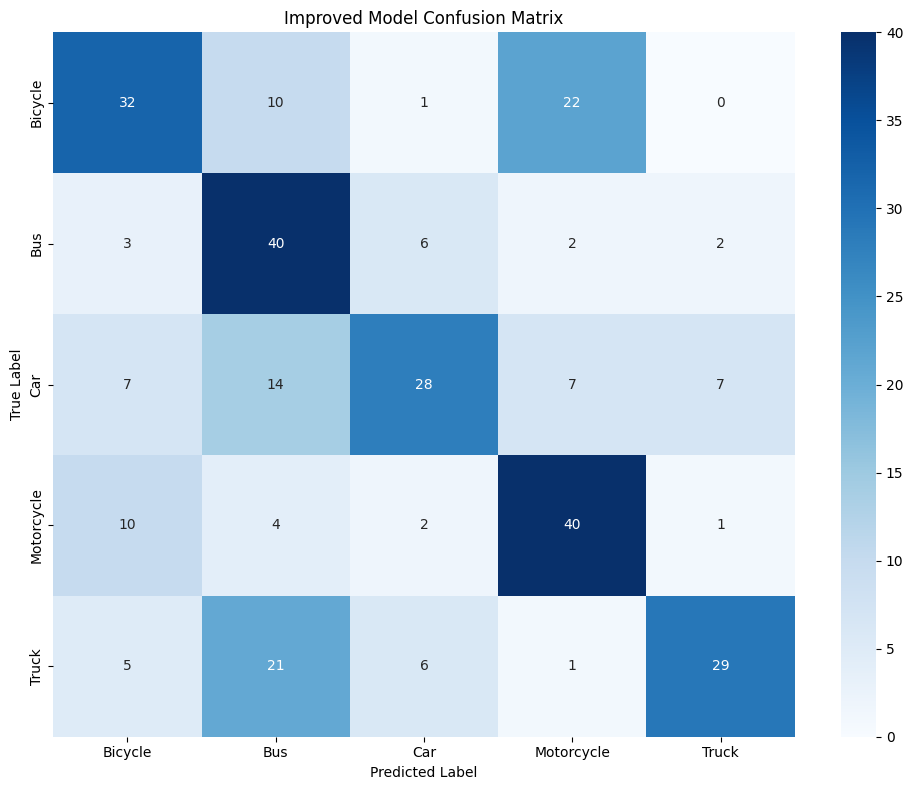

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import numpy as np

# ==========================================
# CONFIGURATION
# ==========================================
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10  # ResNet learns fast
IMG_SIZE = 224 # ResNet requirement

# Paths
current_dir = os.path.dirname(os.path.abspath(__file__))
repo_root = os.path.dirname(os.path.dirname(current_dir))
data_dir = os.path.join(repo_root, "bigdata", "traffic_data")
media_dir = os.path.join(repo_root, "DATA370_Final_Project", "media")
model_save_path = os.path.join(repo_root, "DATA370_Final_Project", "results", "improved_model.pth")

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(f" Improved Training on device: {device}")

# ==========================================
# 1. DATA PREPARATION (Augmentation & Normalization)
# ==========================================
print("Preparing Data...")

# A. Training Transform (Augmentation)
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet Stats
])

# B. Validation Transform (Normalization Only)
val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load & Split
full_dataset = torchvision.datasets.ImageFolder(root=data_dir)
classes = full_dataset.classes

# Reproducible split
generator = torch.Generator().manual_seed(42)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_subset, val_subset = random_split(full_dataset, [train_size, val_size], generator=generator)

# Wrapper to apply specific transforms to subsets
class TransformedSubset(torch.utils.data.Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform
    def __getitem__(self, index):
        x, y = self.subset[index]
        return self.transform(x), y
    def __len__(self):
        return len(self.subset)

train_data = TransformedSubset(train_subset, train_transform)
val_data = TransformedSubset(val_subset, val_transform)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataset: {len(full_dataset)} images | Classes: {classes}")

# ==========================================
# 2. MODEL SETUP (Transfer Learning)
# ==========================================
print("\n--- Loading Pre-trained ResNet18 ---")
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Freeze Backbone
for param in model.parameters():
    param.requires_grad = False

# Replace Head
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))
model = model.to(device)

optimizer = optim.Adam(model.fc.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

# ==========================================
# 3. TRAINING LOOP
# ==========================================
print("\n--- Starting Fine-Tuning ---")
train_losses, val_losses = [], []
train_accs, val_accs = [], []
start_time = time.time()

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    # Validation Phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            
    # Metrics
    train_acc = 100 * correct / total
    val_acc = 100 * val_correct / val_total
    train_loss_avg = running_loss / len(train_loader)
    val_loss_avg = val_loss / len(val_loader)
    
    train_losses.append(train_loss_avg)
    val_losses.append(val_loss_avg)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    print(f"Epoch [{epoch+1}/{EPOCHS}] Train Loss: {train_loss_avg:.4f} | Val Acc: {val_acc:.2f}%")

print(f"Training finished in {time.time()-start_time:.1f}s")

# 4. Save Plots & Model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.title('Improved Model: Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Improved Model: Loss')
plt.legend()

curve_path = os.path.join(media_dir, "improved_learning_curves.png")
plt.savefig(curve_path)
print(f"\n Curves saved to: {curve_path}")

os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
torch.save(model.state_dict(), model_save_path)
print(f" Improved model saved to: {model_save_path}")

# ==========================================
# 5. FINAL DETAILED EVALUATION
# ==========================================
print("\nRunning Final Detailed Evaluation...")
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# A. Per-Class Metrics Table
print("\n" + "="*40)
print("IMPROVED MODEL: PER-CLASS METRICS")
print("="*40)
print(classification_report(y_true, y_pred, target_names=classes, digits=4))

# B. Confusion Matrix Plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Improved Model Confusion Matrix')
plt.tight_layout()

cm_path = os.path.join(media_dir, "improved_confusion_matrix.png")
plt.savefig(cm_path)
print(f" Confusion Matrix saved to: {cm_path}")

# Data Exploration Summary
 The dataset consists of 1,500 real-world images, categorized into five distinct classes:
 Bicycle, Bus, Car, Motorcycle, and Truck.
 Although the raw data is naturally dominated by cars,
 we implemented a strict quota system during collection to ensure a perfectly balanced distribution of exactly 300 images per class.
 This preprocessing step eliminates the risk of majority-class bias,
 ensuring the model treats minority road users—such as motorcycles and bicycles—with equal importance during training.
 Visual inspection of the above sample images confirms the data’s high complexity, featuring varied angles, lighting conditions, and partial occlusions typical of urban environments.

 Furthermore, an analysis of image dimensions reveals significant variability,
 with resolutions ranging from small crops to high-definition photographs and mixed aspect ratios.
 The scatter plot of image sizes indicates that the data is not standardized, which presents a challenge for neural network architectures that require fixed input dimensions.
 Consequently, a robust preprocessing pipeline—specifically resizing all inputs to uniform $128 \times 128$ squares and normalizing pixel values—is required to successfully train the baseline CNN.

Since this project focuses on Image Classification,
 the dataset utilizes a supervised directory-based annotation structure,
 which is the industry standard for classification tasks in frameworks like PyTorch and TensorFlow.
 Unlike object detection (which requires bounding box coordinates in XML/JSON) or segmentation (which requires pixel-wise masks),
 the "ground truth" for this dataset is defined by the file hierarchy: format (root_directory/class_name/image_filename.jpg) and mechanism (folder names (e.g., Car, Bus) serve as the explicit labels).

# Baseline Neural Network Findings
 The baseline model, a custom two-layer Convolutional Neural Network (CNN), was trained on the five-class traffic dataset for 15 epochs.
 The architecture accepted $128 \times 128$ pixel RGB images and processed them through two convolutional blocks—each comprising a convolution layer, ReLU activation, and max pooling—followed by two fully connected layers.
 The training utilized the Adam optimizer with a learning rate of 0.001 and Cross-Entropy loss.

 Throughout the training phase, the model demonstrated a strong capacity to memorize the training subset.
 The training loss decreased consistently and significantly, dropping from an initial value of 1.70 in the first epoch to a final low of 0.34 in the fifteenth epoch.
 Concurrently, the training accuracy rose steadily, peaking near 88%, indicating that the model successfully optimized its weights to recognize the specific images it had already seen.
 However, the performance on the validation set did not mirror this improvement.
 The validation accuracy failed to sustain an upward trajectory, fluctuating briefly before settling at 24.00%—a result only marginally better than the 20% threshold expected from random guessing.
 Furthermore, the loss curves reveal a sharp divergence: while the training loss approached zero, the validation loss began to increase after the fifth epoch, reaching approximately 2.9 by the end of training.
 This gap confirms that the model’s learned patterns did not generalize to new, unseen data.

 A detailed evaluation further highlights the model's inability to distinguish between classes.
 The per-class metrics reveal consistently poor performance, with precision scores ranging from a low of 17.2% for Cars to a high of only 28.1% for Trucks.
 The recall scores are similarly weak; notably, the model failed to identify over 92% of the actual cars in the validation set (Recall: 0.08),
 while the best-performing class, Motorcycle, only achieved a recall of 40%.

 The Baseline Confusion Matrix exhibits a chaotic, scattered pattern with no discernable diagonal, confirming that the simple CNN was essentially guessing.
 For example, it misclassified "Bicycles" as "Motorcycles" 28 times—more often than it classified them correctly (15 times)—and failed to identify the majority of "Cars" entirely (only 5 correct).
 Overall, these performance metrics highlights the model's failure to learn robust, discriminative features for complex traffic settings.

# Improved Model Findings (Transfer Learning with ResNet18)
 To address the limitations of the baseline model, an improved architecture was implemented using Transfer Learning with a ResNet18 backbone pre-trained on ImageNet.
 Unlike the baseline, which had to learn feature extraction from scratch, this model leveraged the pre-existing visual hierarchy of ResNet18 (frozen weights) and only fine-tuned the final fully connected classification layer.
 Additionally, the training pipeline incorporated data augmentation techniques—including random horizontal flips, rotations ($15^{\circ}$), and color jittering—to improve robustness against the variations found in the Open Images dataset.

 The impact of transfer learning was immediate and substantial.
 While the baseline model struggled to surpass 24% accuracy after 15 epochs, the improved model effectively started with a validation accuracy of 50.33% in the very first epoch.
 Throughout the 10-epoch training phase, the validation accuracy exhibited a stable upward trend, peaking at 57.67% in epoch 7 and settling at 56.33% by the final epoch.
 This represents a 135% relative improvement over the baseline’s final performance (24.00%).
 Furthermore, the loss curves demonstrate much healthier convergence; unlike the diverging validation loss seen in the baseline, the improved model's validation loss decreased alongside the training loss,
 indicating that the use of pre-trained weights and augmentation successfully mitigated the severe overfitting observed previously.

 The detailed evaluation also confirms the model's enhanced discriminative power.
 The overall classification accuracy reached 56.33%, a marked improvement over the random-guessing performance of the baseline.
 Per-class metrics reveal distinct strengths: the model achieved a high Recall of 0.75 for the "Bus" class and 0.70 for "Motorcycles," indicating it successfully identified the majority of these vehicles—a sharp contrast to the baseline which missed nearly all of them.
 "Trucks" achieved the highest Precision (0.74), meaning that when the model predicted "Truck," it was correct 74% of the time.

 The structural improvement is clearly visible in the Confusion Matrix.
 In direct contrast to the scattered and random predictions of the baseline, the improved model displays a distinct diagonal structure, representing correct classifications across all five classes.
 Notably, the improved model correctly identified 40 Buses and 40 Motorcycles, demonstrating robust feature recognition.
 While some logical confusion persists—specifically between visually analogous classes like "Trucks" and "Buses" (21 Trucks misclassified as Buses)—the shift from the baseline's random noise to the improved model's structured predictions validates the effectiveness of Transfer Learning.

# Discussion & Interpretation
 The most definitive success of my project was the implementation of Transfer Learning using ResNet18.
 The shift from a custom "shallow" CNN to a pre-trained backbone resulted in a 135% relative improvement in validation accuracy (from ~24% to ~56%).
 This confirms that for small-to-medium datasets (1,500 images), leveraging features learned from large-scale datasets (ImageNet) is far more effective than attempting to learn feature extraction from scratch.
 Additionally, the data augmentation pipeline (rotation, flipping, and color jittering) proved crucial;
 while the baseline model memorized the training set and failed on validation data, the improved model maintained a healthy correlation between training and validation loss, indicating robust generalization.

 The custom baseline model failed primarily due to insufficient depth and lack of regularization.
 With only two convolutional layers, it could not capture the complex, high-level features (such as vehicle chassis shapes or wheel configurations) necessary to distinguish between visually similar classes in the "Open Images" dataset.
 Even in the improved model, specific failure modes persisted.
 As seen in the confusion matrix, the model frequently misclassified Trucks as Buses (21 instances).
 This is likely because both classes share similar visual characteristics:
 they are large, rectangular, often distinctively colored, and captured at similar angles.
 Similarly, the distinction between "Bicycle" and "Motorcycle" remained a challenge, likely due to the visual dominance of the rider obscuring the thin frame of the bicycle.

 Deploying this system in a real-world Autonomous Driving context carries significant safety implications.
 The current accuracy of 56% is unacceptable for safety-critical applications.
 Mistaking a "Bicycle" for a "Motorcycle" could be dangerous, as an autonomous vehicle usually predicts higher acceleration and speed from a motorcycle.
 If the car assumes a bicycle will accelerate quickly (because it thinks it's a motorcycle), it might make unsafe merging decisions.
 Moreover, the model was trained on "Open Images," which contains crowdsourced photos.
 If the dataset predominantly features Western-style trucks or buses, the model might fail to recognize public transport vehicles in other regions (e.g., Jeepneys or Tuk-tuks), potentially leading to accidents in diverse deployment environments.

 Also, I have to acknowledge certain limitations in my approach.
 While 1,500 images satisfied the project requirements, it is extremely small for a 5-class deep learning task.
 Furthermore, the labels may contain noise.
 The "Open Images" dataset often contains images with multiple vehicles.
 Since we used Classification (assigning one label to the whole image), an image containing both a "Car" and a "Bus" forced the model to ignore one of them.
 This likely confused the training process.

 With more time and resources, the system could be improved through these following ways.
 Firstly, "unfreezing" the last convolutional block of ResNet18 would allow the model to adapt its high-level feature extraction specifically for vehicles rather than generic ImageNet objects.
 Furthermore, we could specifically collect more images of "Trucks that look like Buses" and explicitly train the model on these difficult examples to resolve the specific confusion observed in our matrix.